## **Group Project**


##### **Title** : Yummy Or Dummy?
Angela Li, Phoebe Wu, Sarah Feng

##### **Methods and Results**

In [2]:
# Import required packages
import pandas as pd
import altair as alt
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [3]:
# Read mushroom dataset from kaggle via URL
mushrooms_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

# rename columns for readability and ease of use
col_names = {
    "p": "class",
    "x": "cap_shape",
    "s": "cap_surface",
    "n": "cap_colour",
    "t": "bruises",
    "p.1": "odour",
    "f": "gill_attachment",
    "c": "gill_spacing",
    "n.1": "gill_size",
    "k": "gill_colour",
    "e": "stalk_shape",
    "e.1": "stalk_root",
    "s.1": "stalk_surface_above_ring",
    "s.2": "stalk_surface_below_ring",
    "w": "stalk_colour_above_ring",
    "w.1": "stalk_colour_below_ring",
    "p.2": "veil_type",
    "w.2": "veil_colour",
    "o": "ring_number",
    "p.3": "ring_type",
    "k.1": "spore_print_colour",
    "s.3": "population",
    "u": "habitat",
}
mushrooms_df = mushrooms_df.rename(columns=col_names)
mushrooms_df

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
mushrooms_df['class'] = mushrooms_df['class'].replace({
           'e' : 0,
           'p' : 1
        }).astype('int')
# mushrooms_df['cap_shape'] = mushrooms_df['cap_shape'].replace({
#            'b' : 'bell',
#            'c' : 'conical',
#            'x' : 'convex',
#            'f' : 'flat',
#            'k' : 'knobbed',
#            's' : 'sunken'
#         }).astype('category')
# mushrooms_df['cap_surface'] = mushrooms_df['cap_surface'].replace({
#            'g' : 'grooves',
#            'y' : 'scaly',
#            'f' : 'fibrous',
#            's' : 'smooth'
#         }).astype('category')
# mushrooms_df['cap_colour'] = mushrooms_df['cap_colour'].replace({
#            'n' : 'brown',
#            'b' : 'buff',
#            'c' : 'cinnamon',
#            'g' : 'gray',
#            'r' : 'green',
#            'p' : 'pink',
#            'u' : 'purple',
#            'e' : 'red',
#            'w' : 'white',
#            'y' : 'yellow'
#         }).astype('category')
# mushrooms_df['bruises'] = mushrooms_df['bruises'].replace({
#            't' : 'true',
#            'f' : 'false'
#         }).astype('category')
# mushrooms_df

In [5]:
X = mushrooms_df.drop(columns = ['class'])
y = mushrooms_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train.describe()

,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,stalk_shape,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
count,6498,6498,6498,6498,6498,6498,6498,6498,6498,6498,...,6498,6498,6498,6498,6498,6498,6498,6498,6498,6498
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,2920,2607,1809,3810,2807,6339,5443,4505,1387,3677,...,3936,3567,3518,6498,6343,5985,3159,1919,3211,2500


In [6]:
alt.data_transformers.disable_max_rows()
alt.Chart(X_train).mark_bar().encode(
        x=alt.X(alt.repeat('repeat')),
        y="count()",
    ).properties(
        width=200,
        height=200
    ).repeat(
        repeat= list(X_train.columns), 
        columns=5
    )

alt.RepeatChart(...)

In [7]:
categorical_feats = ["cap_shape", "cap_surface", "cap_colour", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_colour_above_ring", "stalk_colour_below_ring", "veil_colour", "ring_type", "spore_print_colour", "population", "habitat"]
ordinal_feats = ["ring_number"]
binary_feats = ["bruises", "gill_attachment", "gill_spacing", "gill_size", "stalk_shape"]
drop_feats = ["veil_type"]

In [8]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=[["n", "o", "t"]]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    ("drop", drop_feats),
)
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['cap_shape', 'cap_surface', 'cap_colour',
                                  'stalk_root', 'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_colour_above_ring',
                                  'stalk_colour_below_ring', 'veil_colour',
                                  'ring_type', 'spore_print_colour',
                                  'population', 'habitat']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['n', 'o', 't']]),
                                 ['ring_number']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['bruises', 'gill_attachment', 'gill_spacing',
                                  'gill_size', 'stalk_shape']),
                                ('drop', 'drop', ['veil_type'])])

In [9]:
pipe_knn = make_pipeline(ct, KNeighborsClassifier())
pipe_svc = make_pipeline(ct, SVC())
pipe_lr= make_pipeline(ct, LogisticRegression())
pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=123))
pipe_xgb = make_pipeline(ct, XGBClassifier(random_state=123, eval_metric="logloss", verbosity=0))
pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123, verbosity=-1)) #, error_score='raise'))
pipe_catboost = make_pipeline(ct, CatBoostClassifier(verbose=0, random_state=123))

classifiers = {
    "knn": pipe_knn,
    "svc": pipe_svc,
    "logistic regression": pipe_lr,
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

In [10]:
results = {}
scoring = ['accuracy', 'precision', 'recall', 'f1']
for (name, model) in classifiers.items():
    scores = cross_validate(model, X_train, y_train, return_train_score=True, scoring=scoring)
    results[name] = pd.DataFrame(scores).mean()

In [11]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
knn,0.018070,0.036369,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
svc,0.218000,0.088494,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
logistic regression,0.067423,0.008279,0.995845,0.99596,0.994583,0.994662,0.996805,0.996965,0.995692,0.995812
random forest,0.182494,0.016778,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,0.299103,0.009034,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.235627,0.008968,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CatBoost,1.821872,0.026775,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


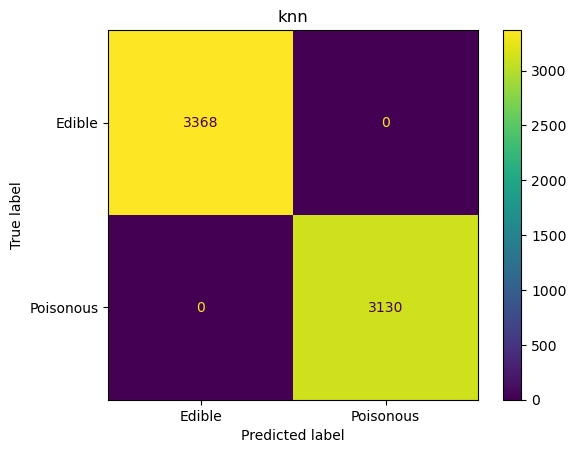

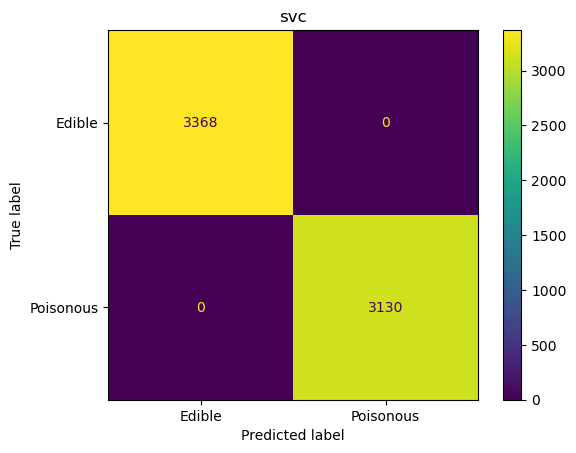

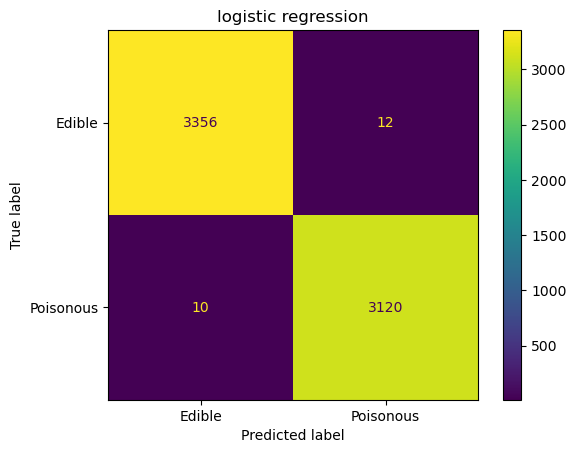

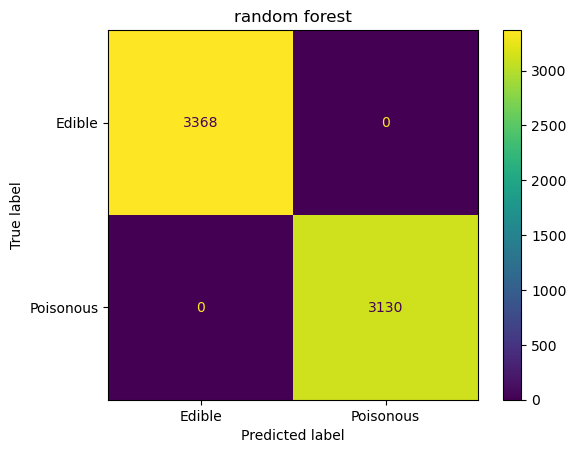

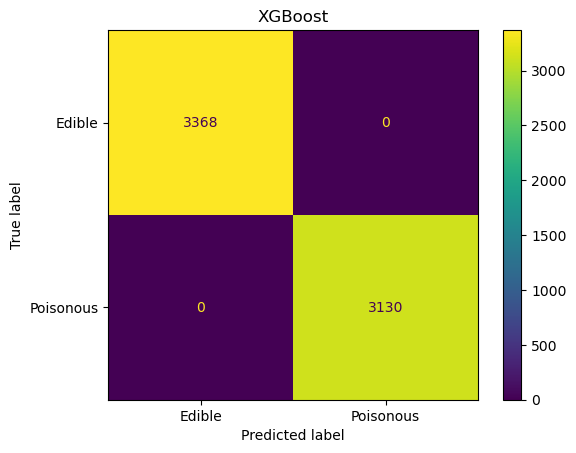

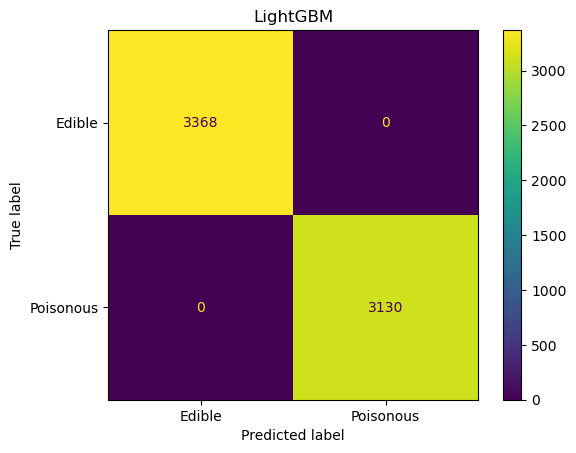

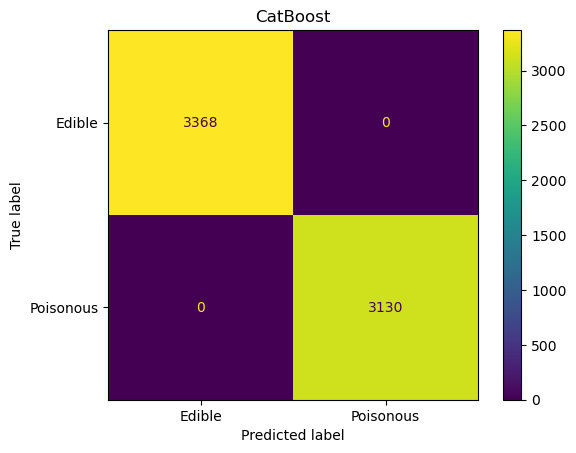

In [14]:
# pipe_knn.fit(X_train, y_train)
# confusion = ConfusionMatrixDisplay.from_estimator(
#     pipe_knn, X_test, y_test, display_labels = ["No Cancellation", "Cancellation"]
# )
for (name, model) in classifiers.items():
    model.fit(X_train, y_train)
    confusion = ConfusionMatrixDisplay.from_estimator(
        model, X_train, y_train, display_labels = ["Edible", "Poisonous"]
        )
    confusion.ax_.set_title(name)

    # print(name)
    # display(confusion)